In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Удаление дубликатов в данных

In [2]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"], "k2": [1, 1, 2, 3, 3, 4, 4],
                     "k3": [1, 1, 2, 3, 3, 4, 4], "k4":[1, 1, 1, 1, 1, 1, 1]})
data

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1
6,two,4,4,1


In [3]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,True


In [4]:
data.drop_duplicates()

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1


In [5]:
data.T.drop_duplicates().T

,k1,k2,k4
0,one,1,1
1,two,1,1
2,one,2,1
3,two,3,1
4,one,3,1
5,two,4,1
6,two,4,1


In [6]:
data.drop(data.columns[data.nunique() == 1], axis=1)

,k1,k2,k3
0,one,1,1
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,3
5,two,4,4
6,two,4,4


# Заполнение пропусков в данных

Nan - маркер отсутствия данных.

In [8]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

,0
0,1.2
1,-3.5
2,NaN
3,0.0


In [9]:
float_data.isna()

,0
0,False
1,False
2,True
3,False


In [11]:
float_data.notna()

,0
0,True
1,True
2,False
3,True


Удаление данных с пропусками

In [10]:
data = pd.DataFrame([[1., 6.5, 3., np.nan], [1., np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan, np.nan],
                     [np.nan, 6.5, 3., np.nan]])
data

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [12]:
data.dropna()

,0,1,2,3


In [13]:
data.dropna(how="all")

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [14]:
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [15]:
data.dropna(thresh=2)

,0,1,2,3
0,1.0,6.5,3.0,NaN
3,NaN,6.5,3.0,NaN


Восполнение отсутствующих данных

In [16]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,0.485543,NaN,NaN
1,0.262326,NaN,NaN
2,0.089968,NaN,-0.485132
3,0.056946,NaN,-0.665941
4,0.402793,1.655347,-0.360704
5,-0.399126,-1.066111,0.769652
6,0.236984,-1.237357,-0.389936


In [17]:
df.fillna(0)

,0,1,2
0,0.485543,0.000000,0.000000
1,0.262326,0.000000,0.000000
2,0.089968,0.000000,-0.485132
3,0.056946,0.000000,-0.665941
4,0.402793,1.655347,-0.360704
5,-0.399126,-1.066111,0.769652
6,0.236984,-1.237357,-0.389936


In [18]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,0.485543,0.500000,0.000000
1,0.262326,0.500000,0.000000
2,0.089968,0.500000,-0.485132
3,0.056946,0.500000,-0.665941
4,0.402793,1.655347,-0.360704
5,-0.399126,-1.066111,0.769652
6,0.236984,-1.237357,-0.389936


In [19]:
df.fillna(method="bfill")

<ipython-input-19-6bd2f34f2c60>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill")


,0,1,2
0,0.485543,1.655347,-0.485132
1,0.262326,1.655347,-0.485132
2,0.089968,1.655347,-0.485132
3,0.056946,1.655347,-0.665941
4,0.402793,1.655347,-0.360704
5,-0.399126,-1.066111,0.769652
6,0.236984,-1.237357,-0.389936


In [20]:
df.fillna(method="bfill", limit=2)

<ipython-input-20-2b83da338013>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", limit=2)


,0,1,2
0,0.485543,NaN,-0.485132
1,0.262326,NaN,-0.485132
2,0.089968,1.655347,-0.485132
3,0.056946,1.655347,-0.665941
4,0.402793,1.655347,-0.360704
5,-0.399126,-1.066111,0.769652
6,0.236984,-1.237357,-0.389936


In [21]:
df.fillna(data.mean())

,0,1,2
0,0.485543,6.500000,3.000000
1,0.262326,6.500000,3.000000
2,0.089968,6.500000,-0.485132
3,0.056946,6.500000,-0.665941
4,0.402793,1.655347,-0.360704
5,-0.399126,-1.066111,0.769652
6,0.236984,-1.237357,-0.389936


In [22]:
df.fillna(data.median())

,0,1,2
0,0.485543,6.500000,3.000000
1,0.262326,6.500000,3.000000
2,0.089968,6.500000,-0.485132
3,0.056946,6.500000,-0.665941
4,0.402793,1.655347,-0.360704
5,-0.399126,-1.066111,0.769652
6,0.236984,-1.237357,-0.389936


Медиана более устойчива к выбросам

In [23]:
data_all = []
for i in range(1000):
    data = []
    for i in range(1000):
        if np.random.random() >= 0.90:
            data.append(np.random.normal(1, 1, 1)[0])
        else:
            data.append(np.random.normal(1, 10, 1)[0])
    data_all.append(data)

data_all = np.array(data_all)

<Axes: >

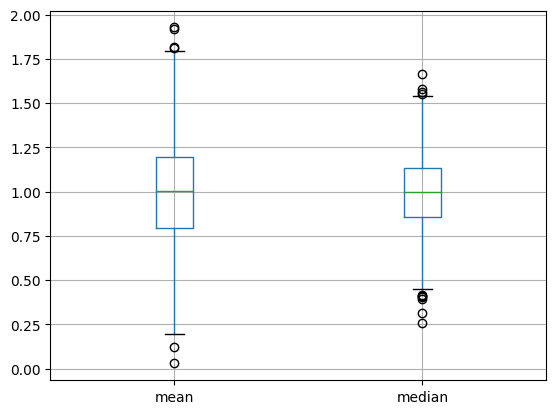

In [24]:
res = pd.DataFrame({"mean": data_all.mean(axis=1), "median": np.median(data_all, axis=1)})
res.boxplot()

Создание дополнительного признака

In [25]:
df["2 is nan"] = df[2].isna().astype(np.int32)
df

,0,1,2,2 is nan
0,0.485543,NaN,NaN,1
1,0.262326,NaN,NaN,1
2,0.089968,NaN,-0.485132,0
3,0.056946,NaN,-0.665941,0
4,0.402793,1.655347,-0.360704,0
5,-0.399126,-1.066111,0.769652,0
6,0.236984,-1.237357,-0.389936,0


Замена значений

In [26]:
data = pd.Series([1., -999., 2., -999., 4., 3.])
data

,0
0,1.0
1,-999.0
2,2.0
3,-999.0
4,4.0
5,3.0


In [27]:
data.replace(-999, np.nan)

,0
0,1.0
1,NaN
2,2.0
3,NaN
4,4.0
5,3.0


# Кодирование признаков

Бинарные факторы: False == 0, True == 1

In [28]:
data = pd.Series(["male"]*10 + ["female"]*5)
data

,0
0,male
1,male
2,male
3,male
4,male
5,male
6,male
7,male
8,male
9,male


In [29]:
(data == "male").astype(np.int32)

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


Категориальные факторы: разбиваем по порядку


In [30]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

df = pd.DataFrame(["moscow", "spb", "moscow", "spb", "spb", "spb", "tomsk", "novgorod", "samara", "saratov"])
df

,0
0,moscow
1,spb
2,moscow
3,spb
4,spb
5,spb
6,tomsk
7,novgorod
8,samara
9,saratov


In [31]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

In [32]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

Категориальные факторы: разбиваем на много бинарных (one hot encoding)

city_is_moscow: 0/1, city_is_spb: 0/1, city_is_tomsk: 0/1 ...

In [33]:
ohe = OneHotEncoder()
ohe.fit(df)
ohe.categories_

[array(['moscow', 'novgorod', 'samara', 'saratov', 'spb', 'tomsk'],
       dtype=object)]

In [34]:
pd.DataFrame(ohe.transform(df).toarray(), columns=ohe.categories_)

,moscow,novgorod,samara,saratov,spb,tomsk
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0


In [35]:
pd.get_dummies(df)

,0_moscow,0_novgorod,0_samara,0_saratov,0_spb,0_tomsk
0,True,False,False,False,False,False
1,False,False,False,False,True,False
2,True,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False
5,False,False,False,False,True,False
6,False,False,False,False,False,True
7,False,True,False,False,False,False
8,False,False,True,False,False,False
9,False,False,False,True,False,False


Цикличные факторы: время дня => позиция на циферблате => sin, cos угла

# Создание новых признаков

Полиномиальные признаки

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [38]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Другие преобразования: sin x, ln x

Дискретизация и группировка по интервалам

array([[<Axes: title={'center': '0'}>]], dtype=object)

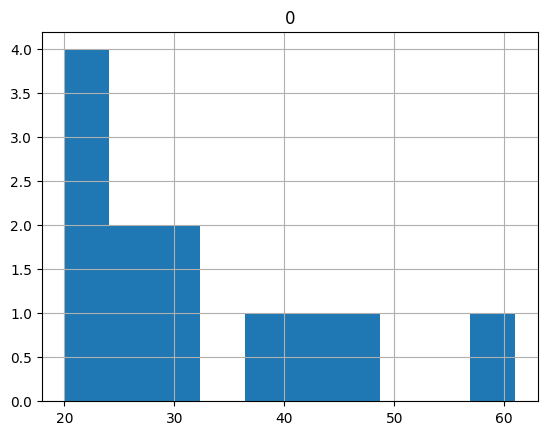

In [39]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
pd.DataFrame(ages).hist()

In [40]:
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [41]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

# Преобразование данных

Приведение к единой шкале: StandardScaler, MinMaxScaler

In [42]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [43]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

Логарифмирование, преобразование Бокса-Кокса

<ipython-input-44-420545ad9d52>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist= False, kde= True)


<Axes: ylabel='Density'>

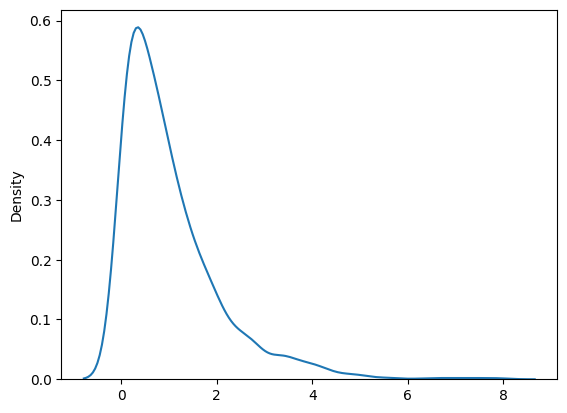

In [44]:
from scipy. stats import boxcox

data = np.random.exponential(size= 1000)
sns.distplot(data, hist= False, kde= True)

<ipython-input-45-ccf020318d66>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data, hist=False, kde=True)


<Axes: ylabel='Density'>

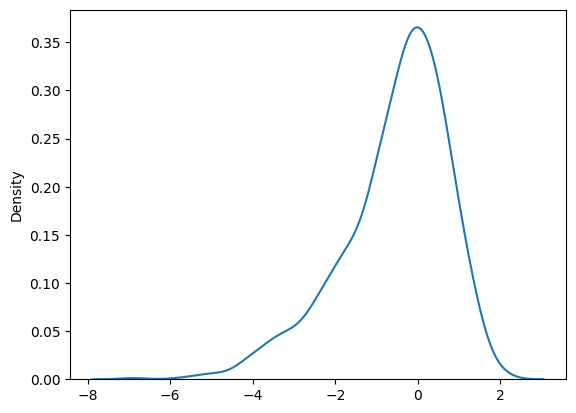

In [45]:
transformed_data = np.log(data)
sns.distplot(transformed_data, hist=False, kde=True)

<ipython-input-46-d8e245ac69aa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data, hist=False , kde=True)


<Axes: ylabel='Density'>

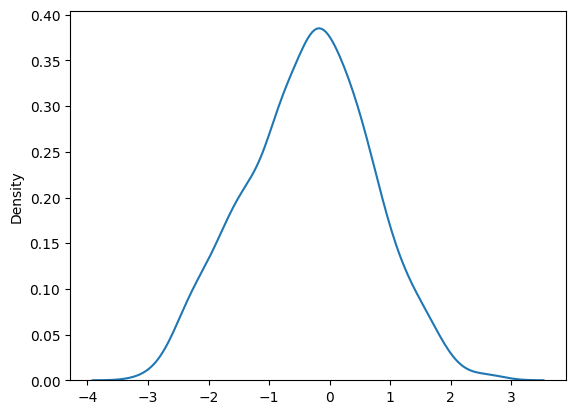

In [46]:
transformed_data, best_lambda = boxcox(data)

sns.distplot(transformed_data, hist=False , kde=True)

In [47]:
best_lambda

np.float64(0.26866242026380444)

# Домашнее задание

In [48]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

In [49]:
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

In [50]:
df.shape

(43245, 32)

In [51]:
# посмотрим данные
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43245 entries, 0 to 43244
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           43245 non-null  int64  
 1   back-suspension                 43245 non-null  int64  
 2   battery-capacity                43245 non-null  float64
 3   charge-time                     43245 non-null  int64  
 4   compression                     43245 non-null  float64
 5   consumption-mixed               43245 non-null  float64
 6   cylinders-order                 43245 non-null  int64  
 7   cylinders-value                 43245 non-null  int64  
 8   engine-feeding                  43245 non-null  int64  
 9   engine-start                    43245 non-null  int64  
 10  engine-stop                     43245 non-null  int64  
 11  engine-type                     43245 non-null  int64  
 12  gear-type                       

In [52]:
# посмотрим пустые значения
df.isna().sum()

,0
index,0
back-suspension,0
battery-capacity,0
charge-time,0
compression,0
consumption-mixed,0
cylinders-order,0
cylinders-value,0
engine-feeding,0
engine-start,0


In [53]:
# приведем заголовки к одинаковому формату
col = ['_'.join(c.split('-')) for c in list(df.columns)]
df.columns = col

In [54]:
# проверим дубликаты
df.duplicated().sum()

np.int64(0)

Дубликатов и пустых знаечний нет.
Построим боксплоты, чтобы посмотреть выбросы

Количественные переменные, включаемые в модель: ['battery_capacity', 'charge_time', 'compression', 'consumption_mixed', 'cylinders_value', 'durability', 'luxury', 'max_speed', 'power_electro_kw', 'valves', 'weight', 'configurations_auto_premiere', 'configurations_back_wheel_base', 'configurations_seats', 'configurations_tank_volume', 'supergen_year_stop', 'durability']

In [55]:
per = ['battery_capacity', 'charge_time', 'compression', 'consumption_mixed', 'cylinders_value', 'durability', 'luxury', 'max_speed', 'power_electro_kw', 'valves', 'weight', 'configurations_auto_premiere', 'configurations_back_wheel_base', 'configurations_seats', 'configurations_tank_volume', 'supergen_year_stop', 'durability']

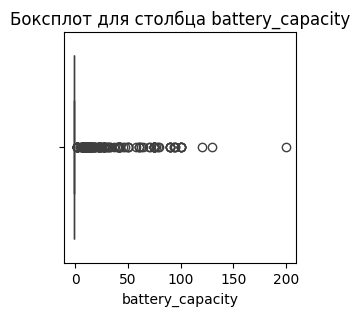

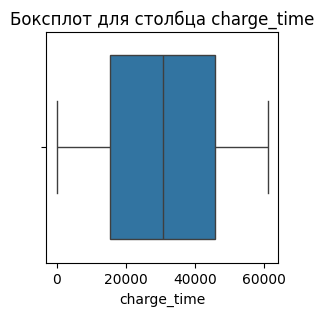

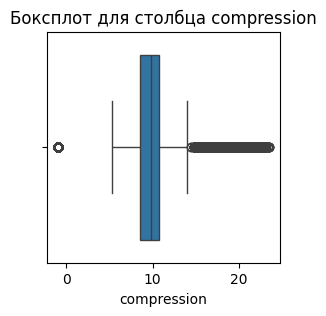

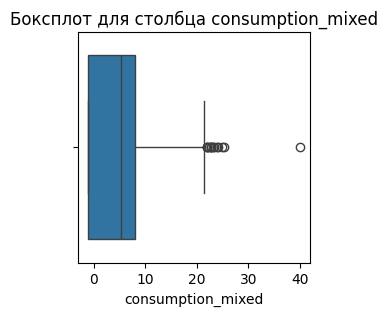

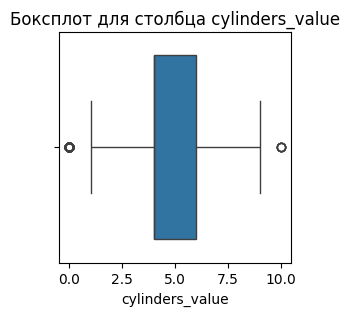

ValueError: Could not interpret value `durability` for `x`. An entry with this name does not appear in `data`.

<Figure size 300x300 with 0 Axes>

In [56]:
# построим для них боксплоты
for i in per:
    plt.figure(figsize = (3,3))
    sns.boxplot(data=df, x=i)
    plt.title(f'Боксплот для столбца {i}')
    plt.show()

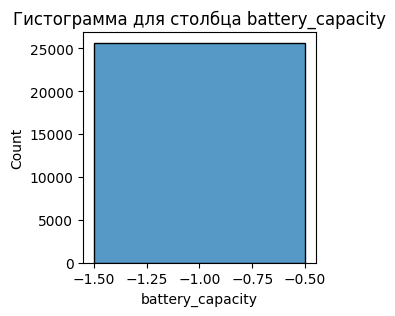

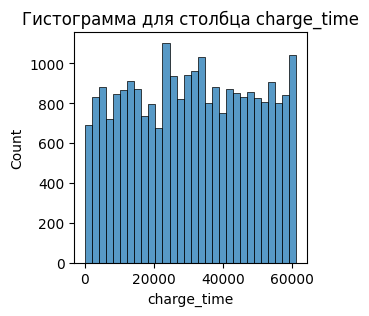

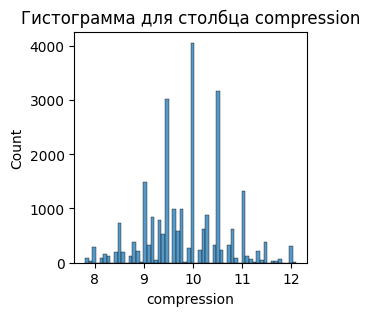

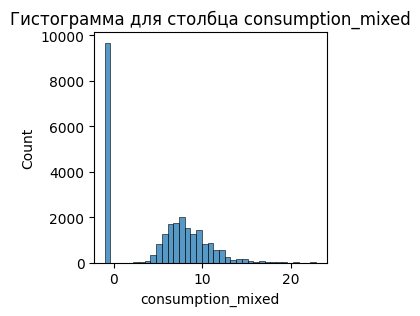

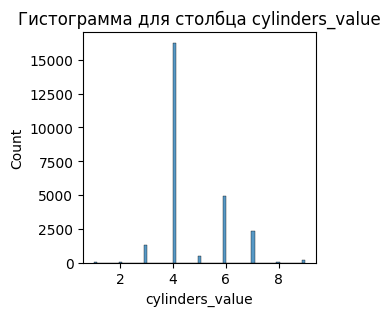

KeyError: 'durability'

<Figure size 300x300 with 0 Axes>

In [62]:
# посмотрим на распределение частот
for i in per:
    plt.figure(figsize = (3,3))
    sns.histplot (data=df[i])
    plt.title(f'Гистограмма для столбца {i}')
    plt.show()


In [61]:
for c in per:
    q3 = df[c].describe()['75%'] # 75-ая квантиль
    q1 = df[c].describe()['25%'] # 25-ая квантиль
    iqr = q3-q1 # длина промежутка
    iqr_min = q1 - 1.5 * iqr # нижняя граница
    iqr_max = q3 + 1.5 * iqr # верхняя граница
    df = df[(iqr_min <= df[c]) & (df[c] <= iqr_max)]


KeyError: 'durability'

In [59]:
df

,index,back_suspension,battery_capacity,charge_time,compression,consumption_mixed,cylinders_order,cylinders_value,engine_feeding,engine_start,...,configurations_front_brake,configurations_safety_rating,configurations_seats,configurations_tank_volume,supergen_year_stop,models_country_from,models_group,models_light_and_commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
5,8,8,-1.0,22100,9.6,6.0,0,4,2,2014,...,4,2,13,45.0,2017.0,10,3,0,1,2468
10,14,3,-1.0,26825,8.5,-1.0,0,6,4,1986,...,1,2,13,-1.0,1988.0,16,3,0,0,2660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


In [60]:
df.shape

(26412, 32)

## Baseline

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [64]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [65]:
reg = LinearRegression().fit(train_X, train_y)

In [66]:
reg.score(train_X, train_y)

0.5378876375339721

In [67]:
mean_squared_error(reg.predict(train_X), train_y)

23153.557822563642

In [68]:
scores = cross_validate(reg, train_X, train_y, cv=3,
                        scoring=('neg_mean_squared_error'))

In [69]:
scores

{'fit_time': array([0.34388971, 0.323457  , 0.18018699]),
 'score_time': array([0.01228404, 0.01628232, 0.03631949]),
 'test_score': array([-23015.04501921, -22961.49379789, -23885.5660308 ])}

In [70]:
mean_squared_error(reg.predict(test_X), test_y)

24532.760909195764

In [71]:
r2_score(test_y, reg.predict(test_X))

0.5239746591709976

In [72]:
x = df.drop(["target"], axis=1)
y = df[["target"]]
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.33, random_state=42)

In [73]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# обучим нашу модель
model = Ridge()

model.fit(train_x, train_y)

print(model.coef_, model.intercept_)

predictions = model.predict(test_x)
# проверяем r2
r2 = r2_score(test_y, predictions)
r2

[-2.54735725e-05  1.41561402e+00  0.00000000e+00  2.83133355e-03
 -2.25856942e+00 -1.76368422e+00 -1.28213506e+00  7.92149025e+01
 -1.63086807e+01  3.85227404e+00 -5.39959747e-04 -4.04591689e+01
  3.34429161e+01  6.40962127e-04 -1.93060972e-01  5.57875554e-01
  8.45714903e+00  1.77176233e-02 -1.05654164e+00  1.99902934e-02
 -2.94556915e-03 -1.97628594e-03  7.73934663e-01 -9.24360191e+00
  1.28754898e+01  2.89665376e+00 -2.19535157e-02  1.63101426e+00
  1.03886758e+01  2.10645610e+02 -2.85407073e-03] [-5647.31879438]


0.5239635037749353

Таким образом, удалось сократить ошибку и немного повысить коэффициент детерминации до 53%